# Lab | Regression Analysis

### Import libraries here:

In [6]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.25 in c:\users\lara\anaconda3\envs\python3\lib\site-packages (from statsmodels) (1.3.4)

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Challenge 1
- I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. 
- In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

## Creating dataframe
Use this command to create the dataframe.
```python
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
```

In [38]:
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

## Plot your data
- Use  `sns.scatterplot` to plot `Age` vs `Tardies` 

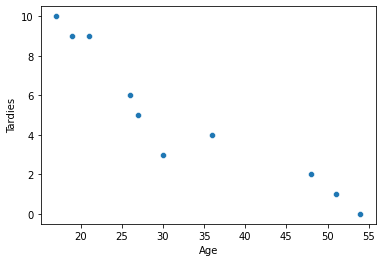

In [39]:
sns.scatterplot(data = student_data, x = 'Age', y = 'Tardies');

- You can also use `sns.pairplot()`.
- This plot the pairwise relationships in a dataset.

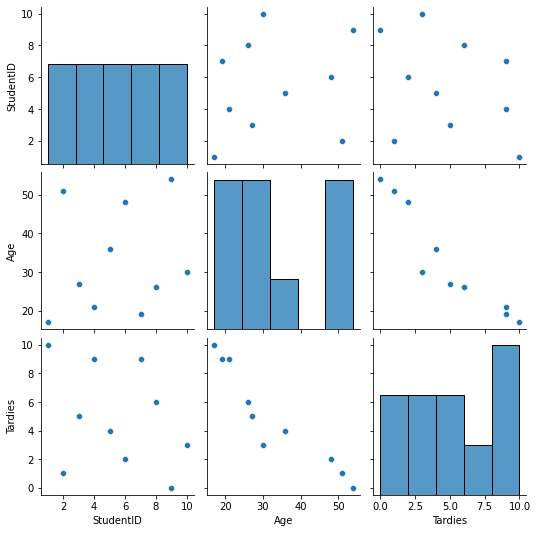

In [40]:
sns.pairplot(student_data);

- Do you see a trend?
- Can you make any hypotheses about the relationship between age and number of tardies?

In [41]:
# Your answer here

## Covariance and correlation

- Calculate the covariance and correlation of the variables. 
- Use `.cov()` and  `.corr()`.
- What is the difference between these two measures?

In [42]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


In [43]:
np.cov(student_data['Age'], student_data['Tardies'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [44]:
np.corrcoef(student_data['Age'], student_data['Tardies'])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

## Linear regression

- Build a linear regression model for this data. 
- You can use scikit-learn library.
```python
from sklearn.linear_model import LinearRegression
```

### Select variables
- Select you `X` and `y` variables.
- `X` will be your independent variable. **"Age"**
- `y` will be your dependent variable. **"Tardies"**

### Train and test
- Split the data into train and test:
- `X_train`, `X_test`, `y_train`, `y_test`

In [122]:
train, test = train_test_split(student_data, random_state=20)
qualityTrain = pd.DataFrame(train, columns=student_data.columns)
qualityTest = pd.DataFrame(test, columns=student_data.columns)

In [123]:
qualityTrain

,StudentID,Age,Tardies
5,6,48,2
0,1,17,10
2,3,27,5
6,7,19,9
9,10,30,3
4,5,36,4
3,4,21,9


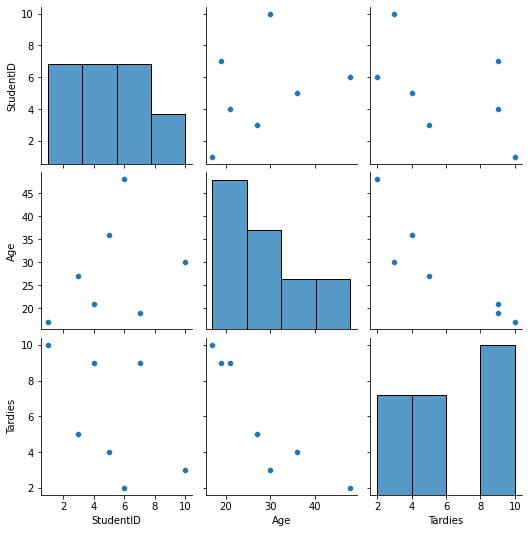

In [124]:
sns.pairplot(qualityTrain);

In [125]:
qualityTest

,StudentID,Age,Tardies
7,8,26,6
1,2,51,1
8,9,54,0


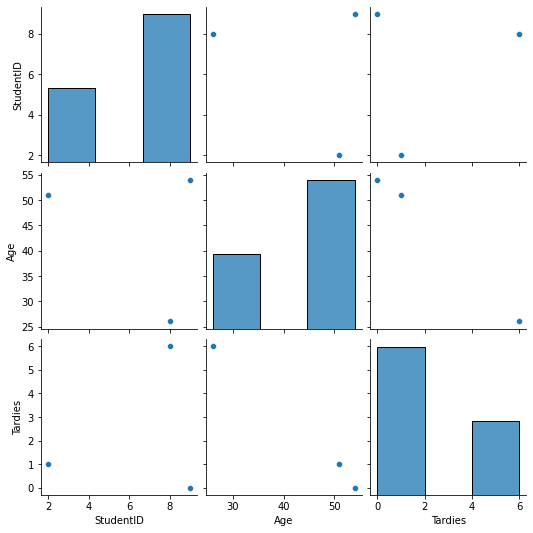

In [126]:
sns.pairplot(qualityTest);

### Modeling
- Instantiate the LinearRegression class

In [141]:
X = sm.add_constant(qualityTrain['Age'])
Y = qualityTrain['Tardies']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

C:\Users\Lara\anaconda3\envs\Python3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     21.18
Date:                Sat, 12 Mar 2022   Prob (F-statistic):            0.00583
Time:                        12:34:05   Log-Likelihood:                -11.884
No. Observations:                   7   AIC:                             27.77
Df Residuals:                       5   BIC:                             27.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5882      1.752      7.757      0.001       9.085      18.091
Age           -0.2683      0.058     -4.602      0.006      -0.418      -0.118
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.124
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.068
Skew:                          -0.897   Prob(JB):                        0.586
Kurtosis:                       2.334   Cond. No.                         89.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
print(X)

   const  Age
5    1.0   48
0    1.0   17
2    1.0   27
6    1.0   19
9    1.0   30
4    1.0   36
3    1.0   21


### Fit the model 
- Fit the model, the algorithm will learn about the data pattern

In [129]:
# Your code here

### Prediction
- Predict the y_test that we splitted.
- Save in a variable called `y_pred_test`

In [130]:
# qualityTest = qualityTest.drop(['StudentID'], axis=1)

In [136]:
qualityTest

,StudentID,Age,Tardies
7,8,26,6
1,2,51,1
8,9,54,0


In [146]:
qualityTest['y_pred_test'] = lm_fit.predict(sm.add_constant(qualityTest['Age']))

In [147]:
qualityTest

,StudentID,Age,Tardies,y_pred_test
7,8,26,6,6.613185
1,2,51,1,-0.093527
8,9,54,0,-0.898332


### Evaluate (test)
- Use the metrics below to evaluate your model and predict data.
- Use the y_test and y_pred_test
```python
from sklearn.metrics import mean_squared_error, r2_score
```

In [ ]:
# Your code here

### Coefficient and intercept
- Use `model.coef_` and `model.intercept_` to return both values.
- Can you interpret the values?

In [ ]:
# Your code here

- This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables
- coefficient of -0.24: it means that for every unit of change in X (age), the change in y (tardie) is about 24% in a negative direction. 
- In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

### Visualize the results
- Use the model that you created to predict the tardies. You will use `X`
- Include predictable tardies into the dataframe.

In [ ]:
# Your code here

### Plot
- You can use the code below:
- Add the ticks and labels.
```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

In [ ]:
# Your code here

_______________________________________

# Challenge 2

- In this challenge you will use `vehicles.csv` dataset.
- This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions.
- The goal of this exercise is to predict `vehicles CO2 emissions` based on several independent variables. 

### Read csv file

In [68]:
vehicles_df = pd.read_csv('data/vehicles.csv')
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Correlations
- Use the variables `Year`, `Cylinders`, `Fuel Barrels/Year`, `Combined MPG`, and `Fuel Cost/Year`.
- Plot the pairwise relationships between columns. You can use `sns.pairplot()`
- Calculate the correlations between each of these variables and the outcome. You can use `.corr()`.
- Analyze which variable is the most important in determining `CO2 Emission Grams/Mile`

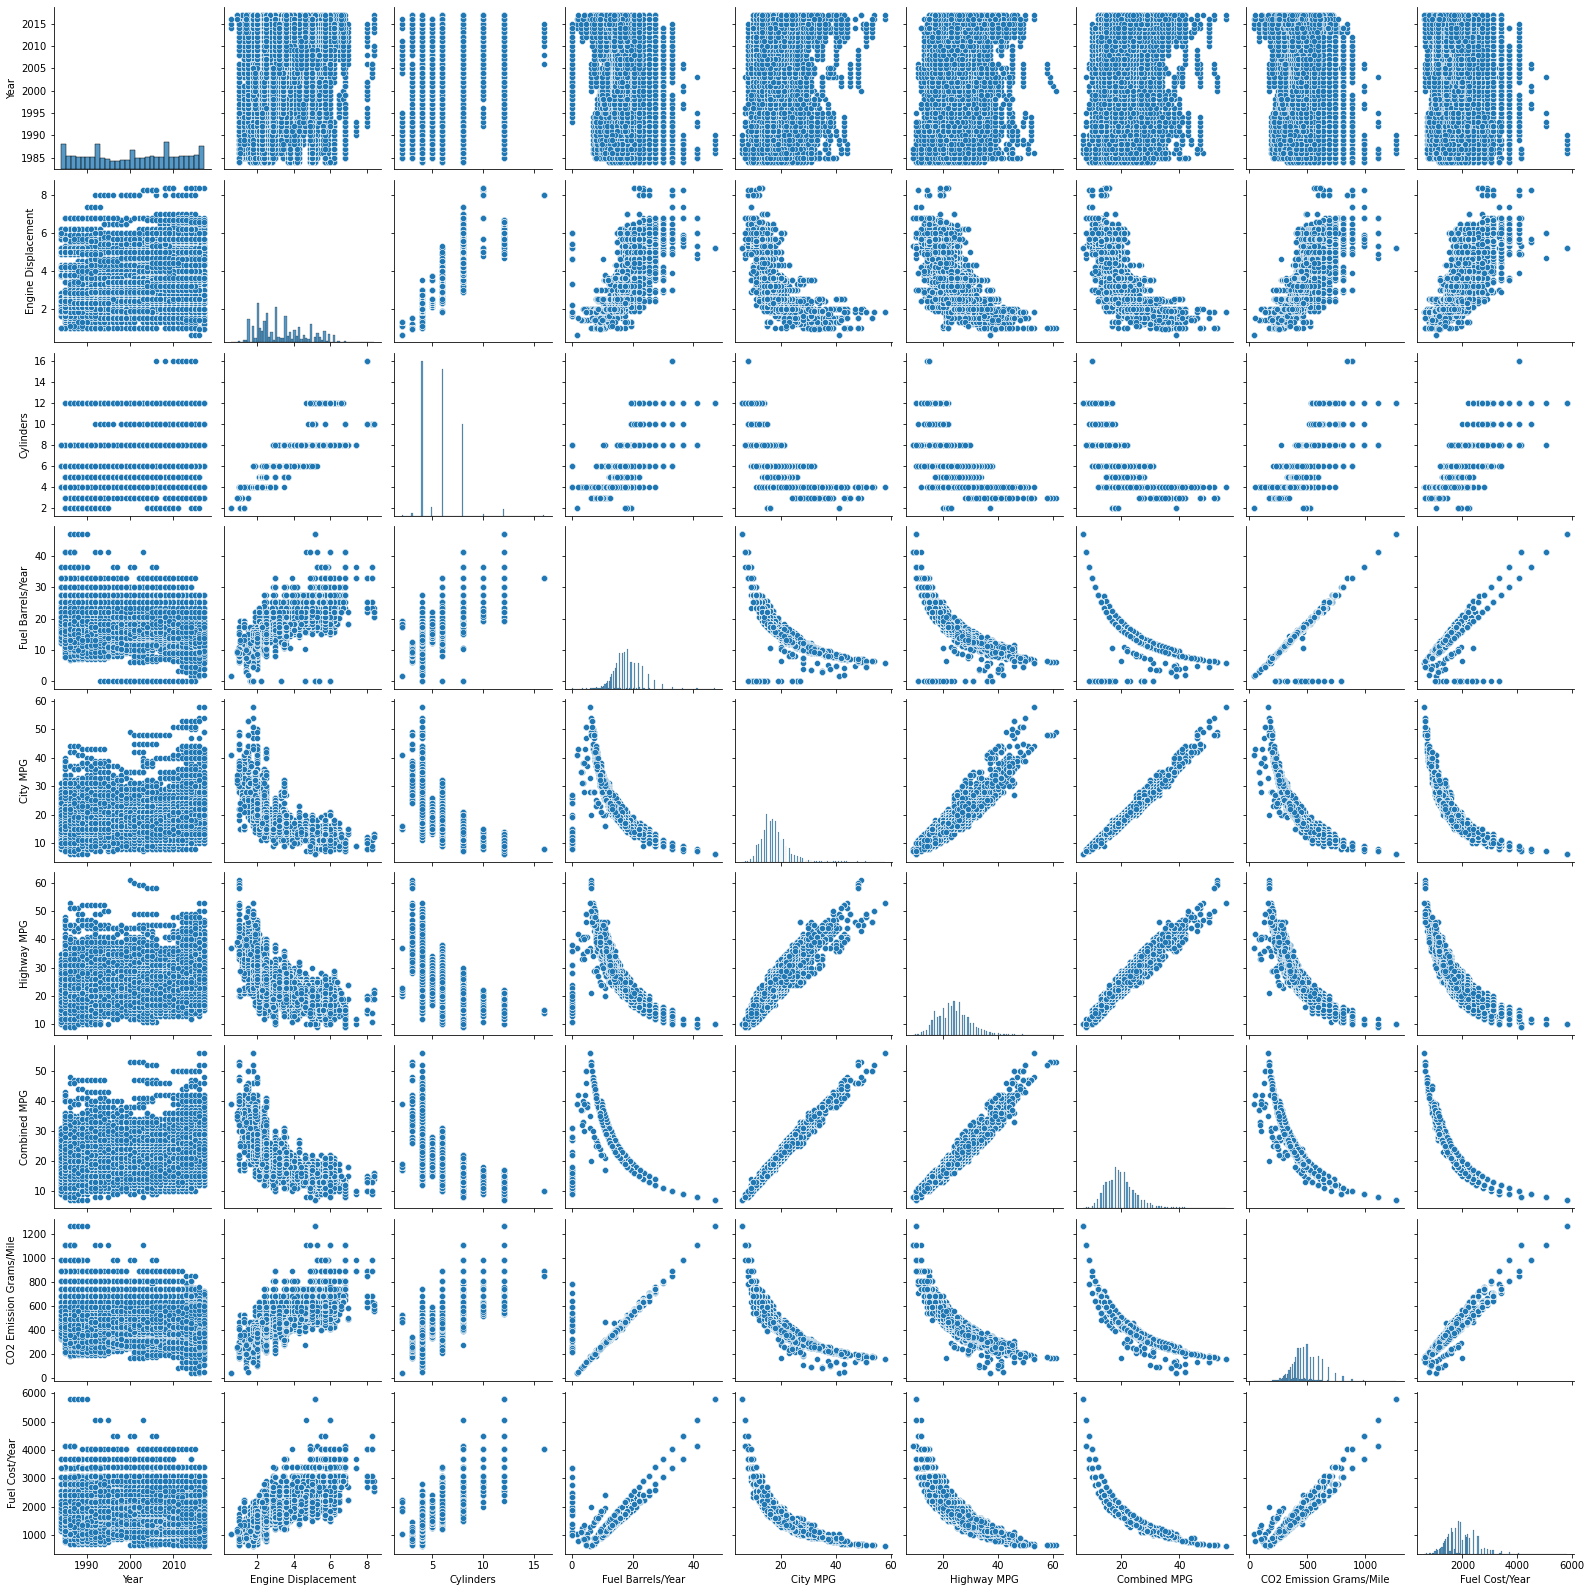

In [149]:
sns.pairplot(vehicles_df)

In [163]:
vehicles_df_selected = vehicles_df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_df_selected.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [164]:
vehicles_df_selected.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


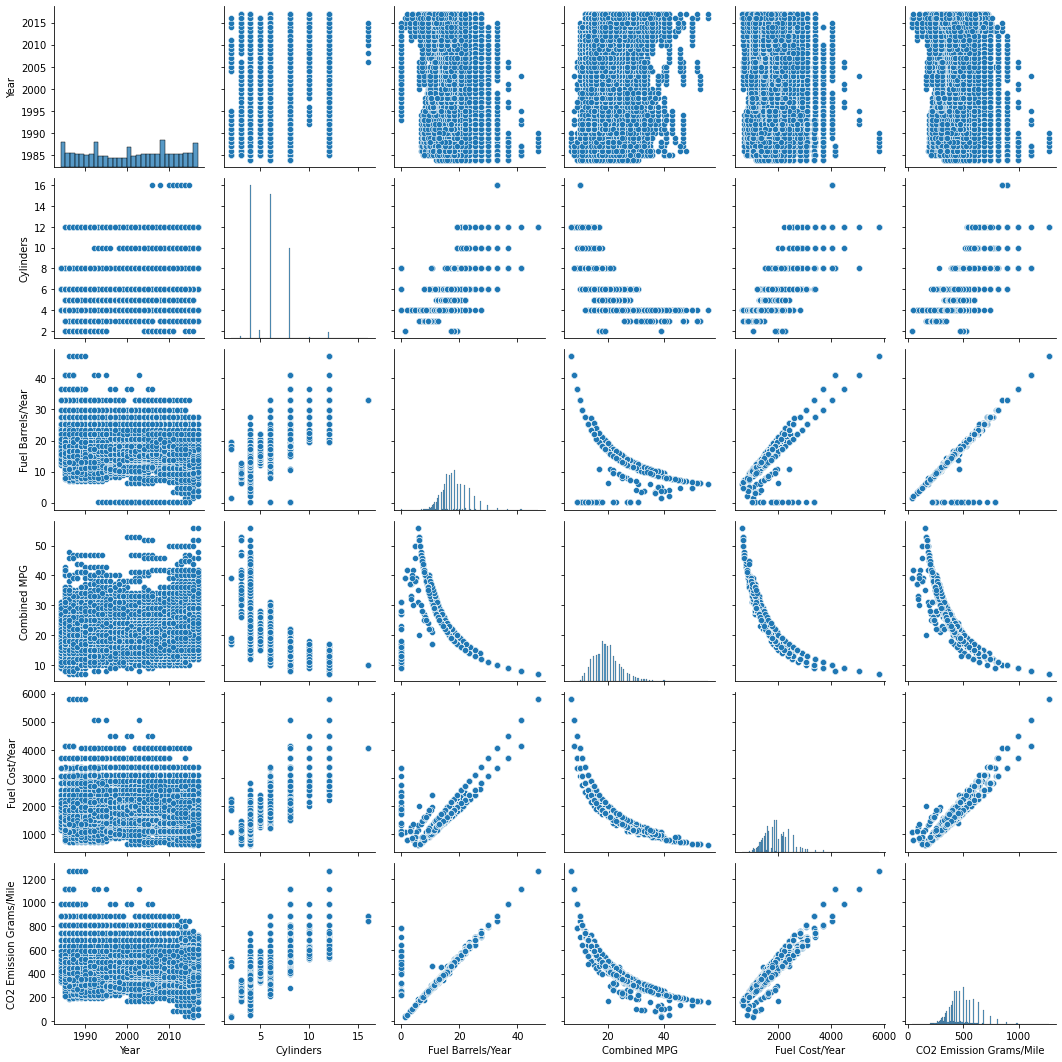

In [165]:
sns.pairplot(vehicles_df_selected)

In [156]:
vehicles_df_selected['Log Combined MPG'] = np.log(vehicles_df_selected['Combined MPG'])

C:\Users\Lara\AppData\Local\Temp/ipykernel_17752/656983970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_df_selected['Log Combined MPG'] = np.log(vehicles_df_selected['Combined MPG'])


In [159]:
vehicles_df_selected['Log Combined MPG'] = np.log(vehicles_df_selected.loc[:,['Combined MPG']])

C:\Users\Lara\AppData\Local\Temp/ipykernel_17752/429700523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_df_selected['Log Combined MPG'] = np.log(vehicles_df_selected.loc[:,['Combined MPG']])


### Linear regression
- Build a linear regression to predict the `CO2 Emission Grams/Mile`

In [169]:
train, test = train_test_split(vehicles_df_selected, random_state=20)
vehiclesTrain = pd.DataFrame(train, columns=vehicles_df_selected.columns)
vehiclesTest = pd.DataFrame(test, columns=vehicles_df_selected.columns)
print(vehiclesTrain.head())
print(vehiclesTest.head())

       Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
28011  1986        4.0          14.982273            22            1500   
34188  2013        4.0          13.184400            25            1600   
7639   2000        4.0          14.982273            22            1500   
5537   2004        8.0          16.480500            20            2000   
32721  1990        4.0          17.347895            19            2150   

       CO2 Emission Grams/Mile  
28011               403.954545  
34188               360.000000  
7639                403.954545  
5537                444.350000  
32721               467.736842  
       Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
2663   2010        8.0          20.600625            16            2550   
20067  2010        8.0          21.974000            15            2200   
3259   2001        6.0          15.695714            21            1600   
5569   2014        8.0          15.695714          

### Predicting (X_test)

In [171]:
X = sm.add_constant(vehiclesTrain[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
Y = vehiclesTrain['CO2 Emission Grams/Mile']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.982
Model:                                 OLS   Adj. R-squared:                  0.982
Method:                      Least Squares   F-statistic:                 3.009e+05
Date:                     Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                             15:38:09   Log-Likelihood:            -1.1270e+05
No. Observations:                    26964   AIC:                         2.254e+05
Df Residuals:                        26958   BIC:                         2.255e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               720.7016     21.543     33.455      0.000     678.477     762.926
Year                 -0.3013      0.011    -27.982      0.000      -0.322      -0.280
Cylinders             1.7962      0.092     19.476      0.000       1.615       1.977
Fuel Barrels/Year    19.6250      0.069    285.104      0.000      19.490      19.760
Combined MPG         -2.7795      0.047    -59.333      0.000      -2.871      -2.688
Fuel Cost/Year        0.0301      0.001     56.131      0.000       0.029       0.031
==============================================================================
Omnibus:                    55535.837   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        255034402.268
Skew:                          17.388   Prob(JB):                         0.00
Kurtosis:                     478.174   Cond. No.                     6.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Evaluate
- Use `mean_squared_error()` and `r2_score()`.
- Use variables `y_test` and `y_pred`

In [172]:
vehiclesTest['y_pred_test'] = lm_fit.predict(sm.add_constant(vehiclesTest[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]))

In [173]:
vehiclesTest.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,y_pred_test
2663,2010,8.0,20.600625,16,2550,555.437500,565.948954
20067,2010,8.0,21.974000,15,2200,592.466667,585.147066
3259,2001,6.0,15.695714,21,1600,423.190476,426.320439
5569,2014,8.0,15.695714,21,1950,424.000000,436.529328
30828,2009,6.0,18.311667,18,1850,493.722222,491.110434
